In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#OpenWeather Key
api_key = weather_api
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
#Empty lists for my variables
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
city_column = []

count = 0
sets = 1

In [4]:
#Run the API call for each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if count < 50:
            count += 1
    else:
            sets += 1
            count = 0
    print(f"Processing Record {count} of Set {sets} | {city}")
    try:
        weather_json = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        wind_speed.append(weather_json['wind']['speed'])
        city_column.append(city)
    except:
        print('City not found. Skipping...')
    pass
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | kushiro
Processing Record 4 of Set 1 | mizan teferi
City not found. Skipping...
Processing Record 5 of Set 1 | san policarpo
Processing Record 6 of Set 1 | tra vinh
City not found. Skipping...
Processing Record 7 of Set 1 | beloha
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | mys shmidta
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | karamea
City not found. Skipping...
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | kurmanayevka
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | matrei
City no

Processing Record 28 of Set 4 | bonavista
Processing Record 29 of Set 4 | asau
Processing Record 30 of Set 4 | lagoa
Processing Record 31 of Set 4 | zhangjiakou
Processing Record 32 of Set 4 | tessalit
Processing Record 33 of Set 4 | longyearbyen
Processing Record 34 of Set 4 | marzuq
Processing Record 35 of Set 4 | lompoc
Processing Record 36 of Set 4 | toledo
Processing Record 37 of Set 4 | half moon bay
Processing Record 38 of Set 4 | makakilo city
Processing Record 39 of Set 4 | wattegama
Processing Record 40 of Set 4 | sao raimundo das mangabeiras
Processing Record 41 of Set 4 | gubkinskiy
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | imbituba
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | aden
Processing Record 48 of Set 4 | ishigaki
Processing Record 49 of Set 4 | linxia
Processing Record 50 of Set 4 | krasnoselkup
Processing Record 0 of 

Processing Record 16 of Set 8 | bud
Processing Record 17 of Set 8 | port maria
Processing Record 18 of Set 8 | west allis
Processing Record 19 of Set 8 | columbia
Processing Record 20 of Set 8 | junction city
Processing Record 21 of Set 8 | eloy
Processing Record 22 of Set 8 | khor
Processing Record 23 of Set 8 | ahipara
Processing Record 24 of Set 8 | lolua
City not found. Skipping...
Processing Record 25 of Set 8 | bethel
Processing Record 26 of Set 8 | alenquer
Processing Record 27 of Set 8 | havre-saint-pierre
Processing Record 28 of Set 8 | zaozerne
Processing Record 29 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 30 of Set 8 | baruun-urt
Processing Record 31 of Set 8 | mandan
Processing Record 32 of Set 8 | pontivy
Processing Record 33 of Set 8 | marsa matruh
Processing Record 34 of Set 8 | gao
Processing Record 35 of Set 8 | beya
Processing Record 36 of Set 8 | kangaatsiaq
Processing Record 37 of Set 8 | kozachi laheri
City not found. Skipping...
Processin

Processing Record 47 of Set 11 | tilichiki
Processing Record 48 of Set 11 | dengzhou
Processing Record 49 of Set 11 | grand river south east
Processing Record 50 of Set 11 | seymchan
Processing Record 0 of Set 12 | suixi
Processing Record 1 of Set 12 | burns lake
Processing Record 2 of Set 12 | rantepao
Processing Record 3 of Set 12 | miracema do tocantins
Processing Record 4 of Set 12 | sungaipenuh
Processing Record 5 of Set 12 | la rioja
City not found. Skipping...
Processing Record 6 of Set 12 | ahome
Processing Record 7 of Set 12 | mangrol
Processing Record 8 of Set 12 | lima duarte
Processing Record 9 of Set 12 | porto seguro
Processing Record 10 of Set 12 | eydhafushi
Processing Record 11 of Set 12 | do gonbadan
City not found. Skipping...
Processing Record 12 of Set 12 | russkiy aktash
Processing Record 13 of Set 12 | kumeny
Processing Record 14 of Set 12 | wailuku
Processing Record 15 of Set 12 | kaka
Processing Record 16 of Set 12 | mandera
Processing Record 17 of Set 12 | sin

In [5]:
#create new dataframe using new columns
cities_dict={"City":city_column,
             "Cloudiness":cloudiness,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":lat,
             "Longitude":lng,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

In [6]:
weather_df = pd.DataFrame(cities_dict)
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,lavrentiya,100,RU,1609436014,97,65.58,-171.00,23.50,4.94
1,guerrero negro,0,MX,1609436014,26,17.67,-100.00,75.07,1.70
2,kushiro,0,JP,1609436014,79,42.98,144.37,17.47,19.42
3,san policarpo,26,ML,1609436014,14,13.30,-4.90,85.75,7.05
4,beloha,0,MG,1609436015,52,-25.17,45.05,81.66,11.07


In [7]:
weather_df.to_csv("../output_data/weather_csv")

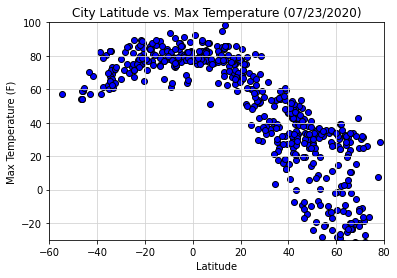

In [8]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,80)
plt.ylim(-30,100)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

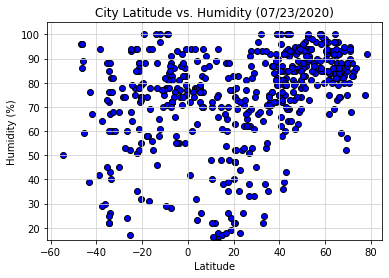

In [9]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

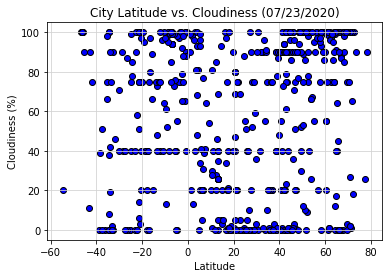

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

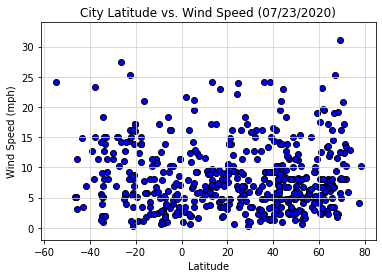

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

In [17]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.savefig("Figures/regress.png")
    plt.show()

In [18]:
north_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
south_df = weather_df.loc[weather_df["Latitude"] < 0,:]

#south_df

The r-squared is: -0.8370432308543767


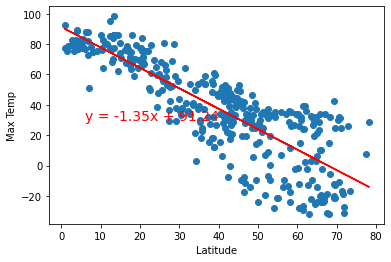

In [27]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,30))

The r-squared is: 0.536585351840754


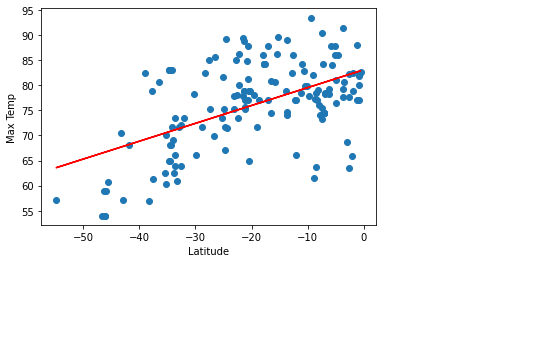

In [28]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,30))

The r-squared is: 0.5201897672470354


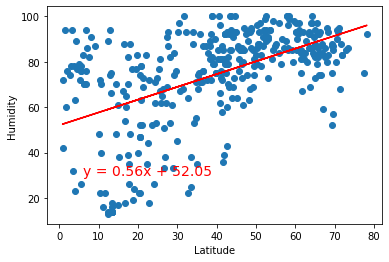

In [29]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

The r-squared is: 0.23484817608624844


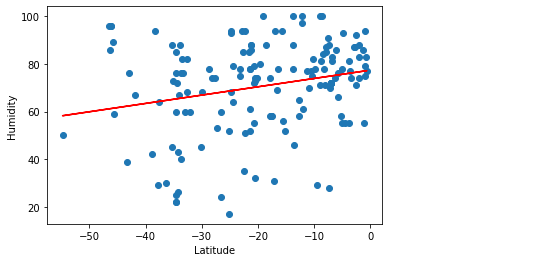

In [30]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

The r-squared is: 0.26215930920489433


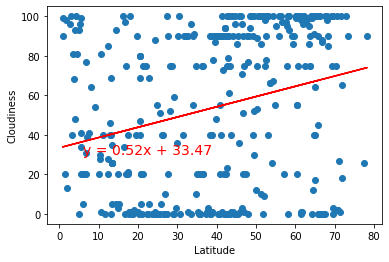

In [31]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

The r-squared is: 0.31114371841051736


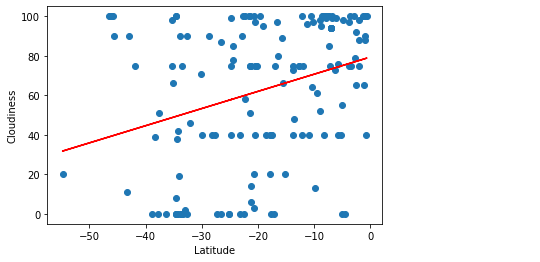

In [32]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(6,30))

The r-squared is: 0.042100793819988575


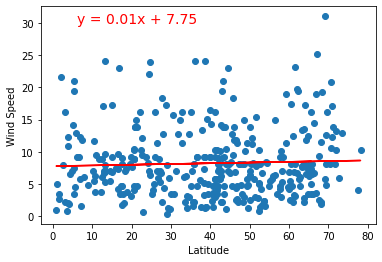

In [33]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))

The r-squared is: -0.23212217020808262


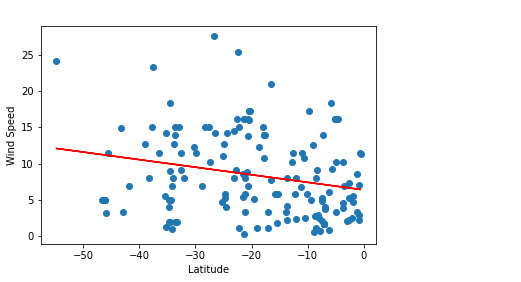

In [26]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))